In [46]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

tweets = pd.read_csv("tweets_clean.csv")
tweets

,tweet_id,created_at,text,lang,favorite_count,retweet_count,user_id,user_name,user_screen_name,followers_count,hashtags,mentions,urls,media_urls,media_count,media_types,is_retweet,retweet_user,retweet_text
0,1053763092830711809,Sat Oct 20 21:41:13 +0000 2018,RT @itsKELSEYtho: @kanyewest This is so beauti...,en,0.0,183,169686021,ye,kanyewest,29337530.0,NaN,"itsKELSEYtho, kanyewest",NaN,https://pbs.twimg.com/media/Dp-S4aPUcAA9sdZ.jpg,1,photo,True,itsKELSEYtho,@kanyewest This is so beautiful Kanye 😭😭😭 http...
1,1306273334791794689,Wed Sep 16 16:46:47 +0000 2020,https://t.co/PMvaJzzcwc,und,5523.0,444,169686021,ye,kanyewest,30983435.0,NaN,NaN,NaN,https://pbs.twimg.com/media/EiDQqzqVoAA5Ehm.jpg,1,photo,False,NaN,NaN
2,1073926102509223936,Sat Dec 15 13:01:50 +0000 2018,I’ve been trying to do a serious interview spe...,en,62540.0,5687,169686021,ye,kanyewest,29436856.0,NaN,NaN,https://twitter.com/i/web/status/1073926102509...,NaN,0,NaN,False,NaN,NaN
3,1041741691152064512,Mon Sep 17 17:32:28 +0000 2018,we don’t need to ever be excited we need to ju...,en,25870.0,4799,169686021,ye,kanyewest,29337530.0,NaN,NaN,NaN,NaN,0,NaN,False,NaN,NaN
4,1306275890184118273,Wed Sep 16 16:56:56 +0000 2020,https://t.co/U7KxxzFOAF,und,7191.0,614,169686021,ye,kanyewest,30984716.0,NaN,NaN,NaN,https://pbs.twimg.com/media/EiDS_hyUwAESZFZ.jpg,1,photo,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,1306034936596500481,Wed Sep 16 00:59:28 +0000 2020,Buuuuuuut he don’t work at of for universal so...,en,11959.0,660,169686021,ye,kanyewest,30982812.0,NaN,NaN,NaN,NaN,0,NaN,False,NaN,NaN
2449,1309458499580157953,Fri Sep 25 11:43:29 +0000 2020,https://t.co/0DuJH8Aeps,und,16814.0,1988,169686021,ye,kanyewest,30988493.0,NaN,NaN,NaN,https://pbs.twimg.com/media/EiwhkDNXkAA-j7p.jpg,1,photo,False,NaN,NaN
2450,707370099129323524,Wed Mar 09 00:59:08 +0000 2016,"can’t wait to get home to North, Saint and my ...",en,41171.0,8879,169686021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,NaN
2451,739827150413402112,Mon Jun 06 14:31:52 +0000 2016,Zine and Shoes from SEASON 2 https://t.co/Zgws...,en,11213.0,3467,169686021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,NaN


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2453 non-null   int64  
 1   created_at        2453 non-null   object 
 2   text              2453 non-null   object 
 3   lang              2453 non-null   object 
 4   favorite_count    2429 non-null   float64
 5   retweet_count     2453 non-null   int64  
 6   user_id           2453 non-null   int64  
 7   user_name         1875 non-null   object 
 8   user_screen_name  1875 non-null   object 
 9   followers_count   1875 non-null   float64
 10  hashtags          62 non-null     object 
 11  mentions          252 non-null    object 
 12  urls              420 non-null    object 
 13  media_urls        866 non-null    object 
 14  media_count       2453 non-null   int64  
 15  media_types       866 non-null    object 
 16  is_retweet        2453 non-null   bool   


In [4]:
tweets['user_name'].unique()

array(['ye', nan, 'KANYE WEST'], dtype=object)

In [6]:
tweets['user_id'].unique()

array([169686021])

In [7]:
tweets['user_screen_name'].unique()

array(['kanyewest', nan], dtype=object)

оставим только user_name, так как нам важно, когда он поменял имя

удалим lang, user_id, user_screen_name, urls, media_urls, media_count, media_types

In [8]:
tweets = tweets.drop(columns=[
    'lang',
    'user_id',
    'user_screen_name',
    'urls',
    'media_urls',
    'media_count',
    'media_types'
])

In [10]:
tweets['created_at'] = pd.to_datetime(
    tweets['created_at'],
    format='%a %b %d %H:%M:%S %z %Y',
    errors='coerce'
)

In [14]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets = tweets.sort_values(by='created_at')
tweets

,tweet_id,created_at,text,favorite_count,retweet_count,user_name,followers_count,hashtags,mentions,is_retweet,retweet_user,retweet_text
480,335569132214972416,2013-05-18 01:34:50+00:00,NEW SONG AND VISUAL FROM MY NEW ALBUM BEING PR...,8042.0,15727,NaN,NaN,NaN,NaN,False,NaN,NaN
444,335987654200016896,2013-05-19 05:17:53+00:00,BLK SKN HEAD http://t.co/CVnr8iUkzN,12838.0,12499,NaN,NaN,NaN,NaN,False,NaN,NaN
1057,335987784068255744,2013-05-19 05:18:24+00:00,BLK SKN HEAD 2 http://t.co/eRErgwx8hc,10922.0,10440,NaN,NaN,NaN,NaN,False,NaN,NaN
1437,345603489080156160,2013-06-14 18:07:47+00:00,NEW MUSIC AT NEW PROJECTION LOCATIONS @ http:/...,2332.0,3583,NaN,NaN,NaN,NaN,False,NaN,NaN
1582,346817569472249856,2013-06-18 02:32:06+00:00,YEEZUS ALBUM NOW AVAILABLE AT http://t.co/7BZw...,6638.0,13610,NaN,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2423,1598520298227105792,2022-12-02 03:31:52+00:00,Never turn our backs Demna a...,0.0,0,ye,32244713.0,NaN,NaN,False,NaN,NaN
873,1598521071178698752,2022-12-02 03:34:57+00:00,Well everyone We had a nice run Jesus is ...,0.0,0,ye,32244101.0,NaN,NaN,False,NaN,NaN
25,1598521311466168320,2022-12-02 03:35:54+00:00,RT @PopBase: Kanye West promotes his 2024 Pres...,0.0,0,ye,32243864.0,NaN,PopBase,True,PopBase,Kanye West promotes his 2024 Presidential camp...
807,1598521964787896321,2022-12-02 03:38:30+00:00,Let’s break one last window before we get outa...,0.0,0,ye,32243987.0,NaN,NaN,False,NaN,NaN


In [16]:
tracks = pd.read_csv("kanye_all_albums_tracks.csv")
tracks

,album_title,artist,release_date,labels,genres,critic_score,user_score,album_length,track_number,track_title,track_length,featured_artists,track_rating,track_rating_count,album_url
0,The College Dropout,Kanye West,"February10,2004/ Release Date","Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",1,Intro,0:19,NaN,78,1884,https://www.albumoftheyear.org/album/508-kanye...
1,The College Dropout,Kanye West,"February10,2004/ Release Date","Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",2,We Don't Care,3:59,NaN,93,4522,https://www.albumoftheyear.org/album/508-kanye...
2,The College Dropout,Kanye West,"February10,2004/ Release Date","Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",3,Graduation Day,1:21,NaN,82,2328,https://www.albumoftheyear.org/album/508-kanye...
3,The College Dropout,Kanye West,"February10,2004/ Release Date","Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",4,All Falls Down,3:43,Syleena Johnson,96,4622,https://www.albumoftheyear.org/album/508-kanye...
4,The College Dropout,Kanye West,"February10,2004/ Release Date","Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",5,I'll Fly Away,1:09,NaN,83,2437,https://www.albumoftheyear.org/album/508-kanye...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,VULTURES 2,¥$,"August3,2024/ Release Date",YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,12,530,4:50,NaN,47,3021,https://www.albumoftheyear.org/album/854855-ys...
218,VULTURES 2,¥$,"August3,2024/ Release Date",YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,13,DEAD,4:23,NaN,44,2876,https://www.albumoftheyear.org/album/854855-ys...
219,VULTURES 2,¥$,"August3,2024/ Release Date",YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,14,FOREVER ROLLING,3:17,NaN,47,2849,https://www.albumoftheyear.org/album/854855-ys...
220,VULTURES 2,¥$,"August3,2024/ Release Date",YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,15,SKY CITY,4:22,NaN,35,2947,https://www.albumoftheyear.org/album/854855-ys...


In [20]:
tracks = tracks.drop("album_url", axis=1)

сводная таблица альбомов

In [21]:
tracks["release_date"] = tracks["release_date"].str.replace("/ Release Date", "", regex=False)

In [22]:
album_summary = (
    tracks.groupby("album_title")
    .agg(
        artist=("artist", "first"),
        release_date=("release_date", "first"),
        labels=("labels", "first"),
        genres=("genres", "first"),
        critic_score=("critic_score", "first"),
        user_score=("user_score", "first"),
        album_length=("album_length", "first"),

        tracks_count=("track_title", "count"),
        avg_track_rating=("track_rating", "mean"),
        total_track_votes=("track_rating_count", "sum")
    )
    .reset_index()
)

In [28]:
import re
import pandas as pd

def clean_date(d):
    if pd.isna(d):
        return None

    # 1. убираем хвост "/ Release Date"
    d = d.replace("/\xa0Release Date", "").strip()

    # 2. добавляем пробел между запятой и годом
    d = re.sub(r",(\d{4})", r", \1", d)

    return d

# применяем
tracks["release_date_clean"] = tracks["release_date"].apply(clean_date)

# конвертация в datetime через ПОЛНЫЙ autodetect
tracks["release_date_clean"] = pd.to_datetime(
    tracks["release_date_clean"],
    infer_datetime_format=True
)

# извлекаем год
tracks["year"] = tracks["release_date_clean"].dt.year

tracks[["release_date", "release_date_clean", "year"]].head()

/var/folders/p_/rq2plg214fx0yv72l4tsnccr0000gn/T/ipykernel_34979/2740400086.py:20: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  tracks["release_date_clean"] = pd.to_datetime(


,release_date,release_date_clean,year
0,"February10,2004/ Release Date",2004-02-10,2004
1,"February10,2004/ Release Date",2004-02-10,2004
2,"February10,2004/ Release Date",2004-02-10,2004
3,"February10,2004/ Release Date",2004-02-10,2004
4,"February10,2004/ Release Date",2004-02-10,2004


In [32]:
import re

def clean_date(d):
    if pd.isna(d):
        return None
    d = d.replace("/\xa0Release Date", "").strip()
    d = re.sub(r",(\d{4})", r", \1", d)
    return d

tracks["release_date_clean"] = tracks["release_date"].apply(clean_date)
tracks["release_date_clean"] = pd.to_datetime(tracks["release_date_clean"])
tracks["year"] = tracks["release_date_clean"].dt.year

In [34]:
tracks = tracks.drop(columns=["release_date"])

In [36]:
tracks

,album_title,artist,labels,genres,critic_score,user_score,album_length,track_number,track_title,track_length,featured_artists,track_rating,track_rating_count,release_date_clean,year
0,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",1,Intro,0:19,NaN,78,1884,2004-02-10,2004
1,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",2,We Don't Care,3:59,NaN,93,4522,2004-02-10,2004
2,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",3,Graduation Day,1:21,NaN,82,2328,2004-02-10,2004
3,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",4,All Falls Down,3:43,Syleena Johnson,96,4622,2004-02-10,2004
4,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",5,I'll Fly Away,1:09,NaN,83,2437,2004-02-10,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,12,530,4:50,NaN,47,3021,2024-08-03,2024
218,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,13,DEAD,4:23,NaN,44,2876,2024-08-03,2024
219,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,14,FOREVER ROLLING,3:17,NaN,47,2849,2024-08-03,2024
220,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,15,SKY CITY,4:22,NaN,35,2947,2024-08-03,2024


In [43]:
album_summary = (
    tracks.groupby("album_title")
    .agg(
        artist=("artist", "first"),

        # ДАТЫ
        release_date=("release_date_clean", "min"),
        year=("year", "min"),

        # МЕТАДАННЫЕ
        labels=("labels", "first"),
        genres=("genres", "first"),

        # ОЦЕНКИ АЛЬБОМОВ
        critic_score=("critic_score", "first"),
        user_score=("user_score", "first"),

        # ПРОЧЕЕ
        album_length=("album_length", "first"),
        tracks_count=("track_title", "count"),
        avg_track_rating=("track_rating", "mean"),
        total_track_votes=("track_rating_count", "sum"),
    )
    .reset_index()
)

album_summary

,album_title,artist,release_date,year,labels,genres,critic_score,user_score,album_length,tracks_count,avg_track_rating,total_track_votes
0,808s & Heartbreak,Kanye West,2008-11-24,2008,"Def Jam, Roc-A-Fella","Synthpop, Electropop, Art Pop, Pop Rap, Altern...",74,80,52 minutes,12,84.250000,33509
1,Donda,Kanye West,2021-08-29,2021,"G.O.O.D., Def Jam","Christian Hip Hop, Experimental Hip Hop, Gospe...",59,72,"1 hour, 48 minutes",27,75.370370,69044
2,Donda 2,Kanye West,2022-02-24,2022,No Label,"Trap, Experimental Hip Hop, Pop Rap, Alternati...",46,33,47 minutes,16,51.812500,8870
3,Graduation,Kanye West,2007-09-11,2007,Roc-A-Fella,"Pop Rap, Electropop, Chipmunk Soul, Electro Hop",76,86,51 minutes,13,87.461538,59232
4,JESUS IS KING,Kanye West,2019-10-25,2019,"G.O.O.D., Def Jam","Christian Hip Hop, CCM, Gospel, Pop Rap, Alter...",54,54,27 minutes,11,63.909091,20640
5,KIDS SEE GHOSTS,KIDS SEE GHOSTS,2018-06-08,2018,"Def Jam, G.O.O.D.","Experimental Hip Hop, Pop Rap, Alternative R&B...",84,87,23 minutes,7,91.142857,27555
6,Late Registration,Kanye West,2005-08-30,2005,Roc-A-Fella,"Pop Rap, Conscious Hip Hop, Jazz Rap, Neo-Soul...",84,90,"1 hour, 10 minutes",21,88.523810,62793
7,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,2010,"Def Jam, Roc-A-Fella","Pop Rap, Hip Hop, Art Pop, Experimental Hip Hop",91,89,"1 hour, 8 minutes",13,89.615385,75832
8,The College Dropout,Kanye West,2004-02-10,2004,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",21,87.619048,75421
9,The Life of Pablo,Kanye West,2016-02-14,2016,"G.O.O.D., Def Jam","Pop Rap, Experimental Hip Hop, Trap, Contempor...",77,84,"1 hour, 5 minutes",20,84.350000,65743


In [44]:
tracks.columns

Index(['album_title', 'artist', 'labels', 'genres', 'critic_score',
       'user_score', 'album_length', 'track_number', 'track_title',
       'track_length', 'featured_artists', 'track_rating',
       'track_rating_count', 'release_date_clean', 'year'],
      dtype='object')

In [55]:
tweets.columns

Index(['tweet_id', 'created_at', 'text', 'favorite_count', 'retweet_count',
       'user_name', 'followers_count', 'hashtags', 'mentions', 'is_retweet',
       'retweet_user', 'retweet_text'],
      dtype='object')

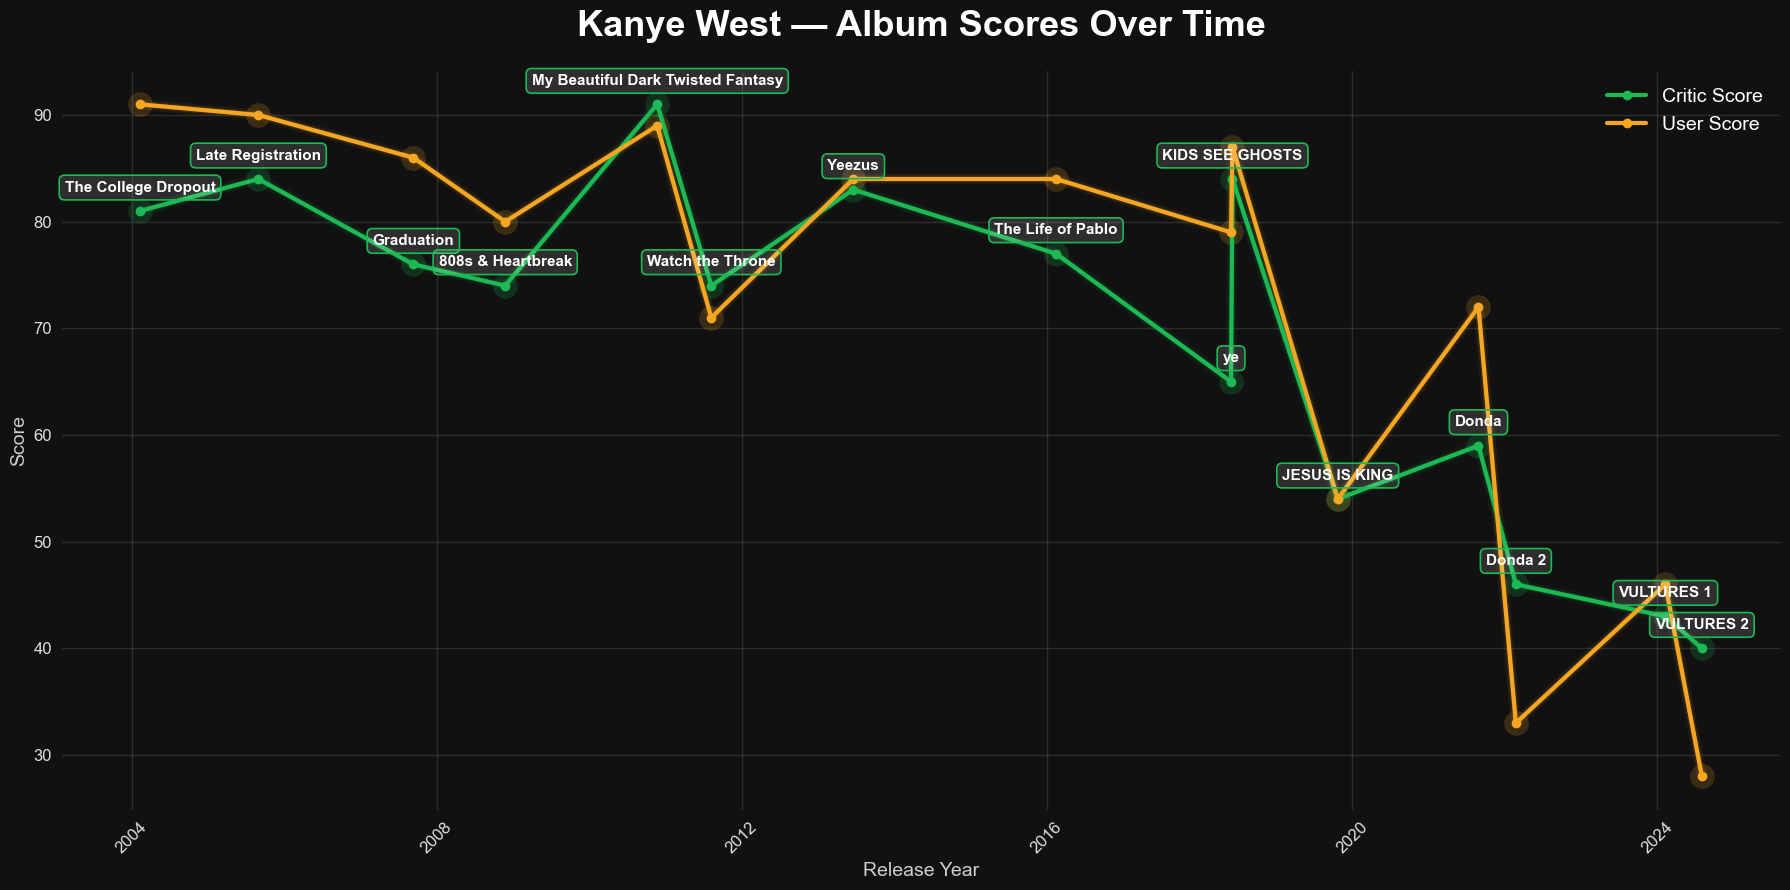

In [53]:
import matplotlib.pyplot as plt
import numpy as np

df = album_summary.sort_values("release_date")

fig, ax = plt.subplots(figsize=(18, 9))

# Цвета
critic_color = "#1DB954"   # Spotify Green
user_color = "#F5A623"     # Warm modern orange
bubble_bg = "#FFFFFF20"    # нежная прозрачность

# --- Градиентные "свечения" линий ---
for lw, alpha in [(8, 0.06), (5, 0.12), (3, 0.22)]:
    ax.plot(df["release_date"], df["critic_score"],
            color=critic_color, linewidth=lw, alpha=alpha)
    ax.plot(df["release_date"], df["user_score"],
            color=user_color, linewidth=lw, alpha=alpha)

# --- Основные линии ---
ax.plot(df["release_date"], df["critic_score"],
        marker="o", linewidth=3, color=critic_color, label="Critic Score")
ax.plot(df["release_date"], df["user_score"],
        marker="o", linewidth=3, color=user_color, label="User Score")

# --- Тени под точками ---
ax.scatter(df["release_date"], df["critic_score"],
           s=300, color=critic_color, alpha=0.18)
ax.scatter(df["release_date"], df["user_score"],
           s=300, color=user_color, alpha=0.18)

# --- Красивые пузырьковые подписи ---
for i, row in df.iterrows():
    ax.annotate(
        row["album_title"],
        (row["release_date"], row["critic_score"]),
        textcoords="offset points",
        xytext=(0, 14),
        ha='center',
        fontsize=11,
        fontweight="bold",
        color="#ffffff",
        bbox=dict(
            boxstyle="round,pad=0.35",
            fc=bubble_bg,
            ec=critic_color,
            lw=1.2
        )
    )

# --- Оформление ---
title = "Kanye West — Album Scores Over Time"
ax.set_title(title, fontsize=26, fontweight="bold", pad=25, color="#ffffff")

ax.set_xlabel("Release Year", fontsize=14, color="#cccccc")
ax.set_ylabel("Score", fontsize=14, color="#cccccc")

ax.grid(alpha=0.18, color="#aaaaaa")
ax.tick_params(colors="#dddddd", labelsize=12)

legend = ax.legend(fontsize=14, facecolor="#222222", edgecolor="#444444")
for text in legend.get_texts():
    text.set_color("#ffffff")

fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd

# Преобразуем timestamp
tweets["created_at"] = pd.to_datetime(tweets["created_at"], errors="coerce")

# Убираем возможные NaT
tweets = tweets.dropna(subset=["created_at"])

# Частота твитов по дням
tweet_daily = (
    tweets.groupby(tweets["created_at"].dt.date)
          .size()
          .reset_index(name="count")
)

# Возвращаем дату в datetime
tweet_daily["created_at"] = pd.to_datetime(tweet_daily["created_at"])

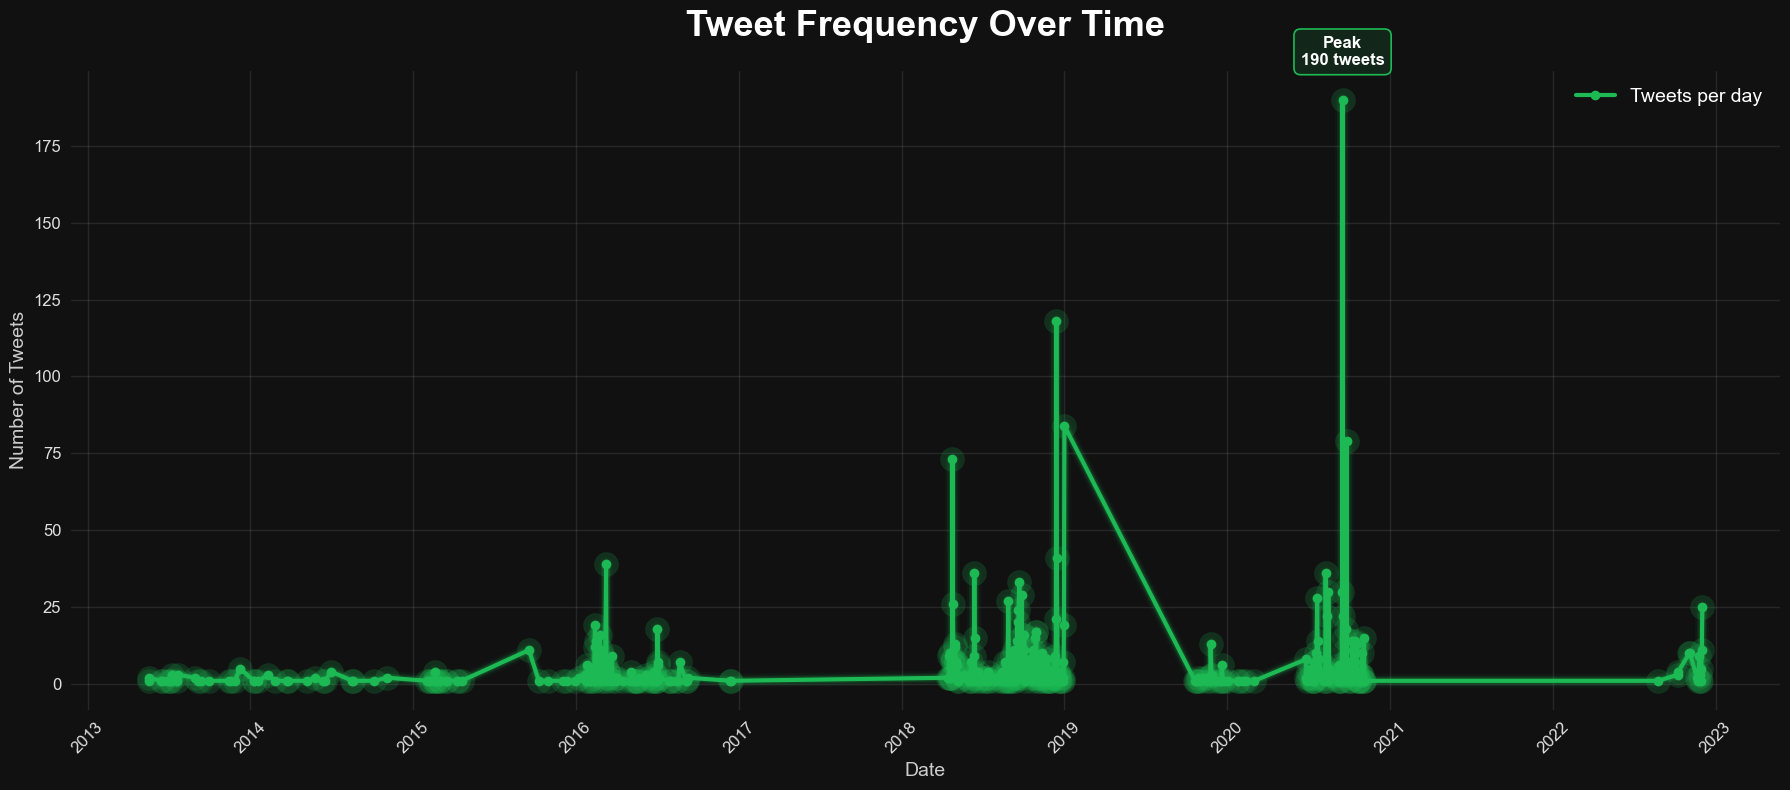

In [58]:
import matplotlib.pyplot as plt
import numpy as np

df = tweet_daily.sort_values("created_at")

fig, ax = plt.subplots(figsize=(18, 8))

# Цвета
tweet_color = "#1DB954"  # яркий Spotify Green
background = "#111111"
text_color = "#FFFFFF"

# --- Glow-эффект (мягкие подсветки линий) ---
for lw, alpha in [(10, 0.05), (7, 0.1), (5, 0.18)]:
    ax.plot(
        df["created_at"], df["count"],
        color=tweet_color, linewidth=lw, alpha=alpha
    )

# --- Основная линия ---
ax.plot(
    df["created_at"], df["count"],
    marker="o", linewidth=3, color=tweet_color, label="Tweets per day"
)

# --- Тени под точками ---
ax.scatter(
    df["created_at"], df["count"],
    s=300, color=tweet_color, alpha=0.18
)

# --- Подпись пика ---
peak_value = df["count"].max()
peak_day = df.loc[df["count"].idxmax(), "created_at"]

ax.annotate(
    f"Peak\n{peak_value} tweets",
    xy=(peak_day, peak_value),
    xytext=(0, 25),
    textcoords="offset points",
    ha="center",
    fontsize=12,
    fontweight="bold",
    color=text_color,
    bbox=dict(
        boxstyle="round,pad=0.4",
        fc="#1DB95422",    # нежно-зелёный прозрачный фон
        ec=tweet_color,
        lw=1.2
    )
)

# --- Оформление графика ---
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

ax.set_title(
    "Tweet Frequency Over Time",
    fontsize=26, fontweight="bold", color=text_color, pad=25
)

ax.set_xlabel("Date", fontsize=14, color="#cccccc")
ax.set_ylabel("Number of Tweets", fontsize=14, color="#cccccc")

ax.tick_params(colors="#dddddd", labelsize=12)
ax.grid(alpha=0.15, color="#aaaaaa")

# Legend
legend = ax.legend(fontsize=14, facecolor="#222222", edgecolor="#444444")
for text in legend.get_texts():
    text.set_color(text_color)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# created_at уже должен быть в datetime
tweets["created_at"] = pd.to_datetime(tweets["created_at"], errors="coerce")

# агрегируем лайки по дням
likes_daily = (
    tweets.groupby(tweets["created_at"].dt.date)["favorite_count"]
          .sum()
          .reset_index()
)

likes_daily["created_at"] = pd.to_datetime(likes_daily["created_at"])
likes_daily = likes_daily.sort_values("created_at")

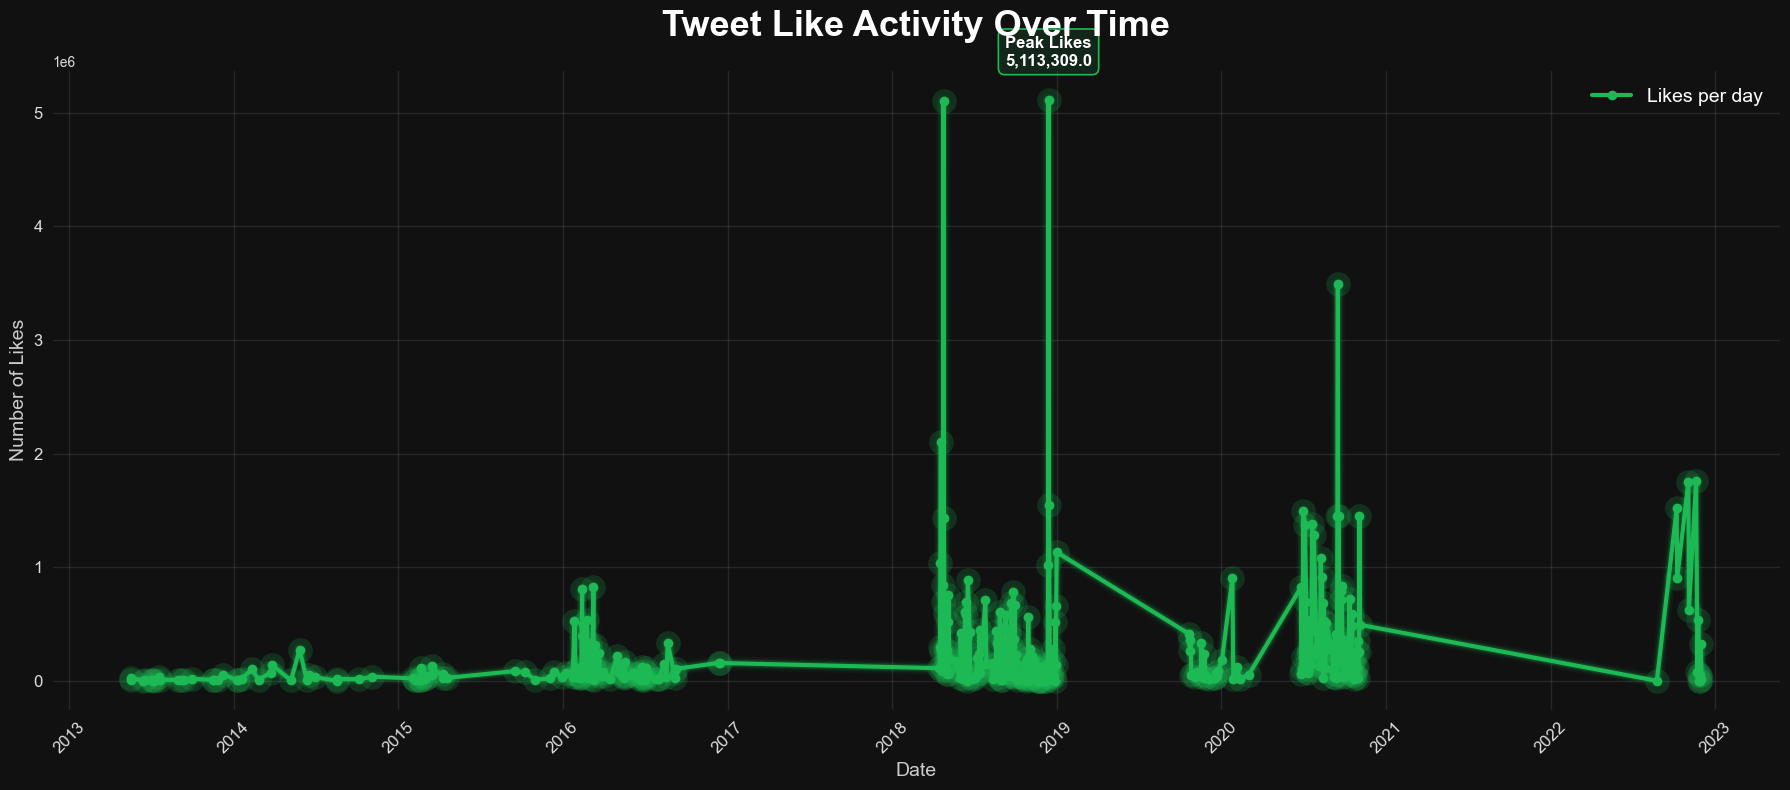

In [60]:
import matplotlib.pyplot as plt
import numpy as np

df = likes_daily

fig, ax = plt.subplots(figsize=(18, 8))

# Цвета
like_color = "#1DB954"  # Spotify green
background = "#111111"
text_color = "#FFFFFF"

# --- Glow-эффект ---
for lw, alpha in [(10, 0.05), (7, 0.1), (5, 0.18)]:
    ax.plot(
        df["created_at"], df["favorite_count"],
        color=like_color, linewidth=lw, alpha=alpha
    )

# --- Основная линия ---
ax.plot(
    df["created_at"], df["favorite_count"],
    marker="o", linewidth=3, color=like_color, label="Likes per day"
)

# --- Тени под точками ---
ax.scatter(
    df["created_at"], df["favorite_count"],
    s=300, color=like_color, alpha=0.18
)

# --- Пиковый день по лайкам ---
peak_value = df["favorite_count"].max()
peak_day = df.loc[df["favorite_count"].idxmax(), "created_at"]

ax.annotate(
    f"Peak Likes\n{peak_value:,}",
    xy=(peak_day, peak_value),
    xytext=(0, 25),
    textcoords="offset points",
    ha="center",
    fontsize=12,
    fontweight="bold",
    color=text_color,
    bbox=dict(
        boxstyle="round,pad=0.4",
        fc="#1DB95422",
        ec=like_color,
        lw=1.2
    )
)

# --- Оформление ---
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

ax.set_title(
    "Tweet Like Activity Over Time",
    fontsize=26, fontweight="bold", color=text_color, pad=25
)

ax.set_xlabel("Date", fontsize=14, color="#cccccc")
ax.set_ylabel("Number of Likes", fontsize=14, color="#cccccc")

ax.tick_params(colors="#dddddd", labelsize=12)
ax.grid(alpha=0.15, color="#aaaaaa")

legend = ax.legend(fontsize=14, facecolor="#222222", edgecolor="#444444")
for text in legend.get_texts():
    text.set_color(text_color)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

проанализируем слова

In [61]:
import re

def clean_text(text):
    text = text.lower()                               # нижний регистр
    text = re.sub(r"http\S+", "", text)               # ссылки
    text = re.sub(r"@\w+", "", text)                  # упоминания
    text = re.sub(r"#\w+", "", text)                  # хэштеги
    text = re.sub(r"[^a-zA-Zа-яА-ЯёЁ\s]", " ", text)  # всё кроме букв
    text = re.sub(r"\s+", " ", text).strip()          # лишние пробелы
    return text

tweets["clean_text"] = tweets["text"].astype(str).apply(clean_text)

In [63]:
stop_words = {
    "the","a","an","and","or","is","it","to","in","of","for","on","at",
    "this","that","i","you","me","my","we","they","he","she","them",
    "with","as","be","are","am","was","were","will","rt","from","so",
    "but","not","your","our","their"
}

In [71]:
from collections import Counter

word_counts = Counter()

for text in tweets["clean_text"]:
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    word_counts.update(words)

top_words1000 = word_counts.most_common(1000)
top_words1000

[('love', 151),
 ('all', 140),
 ('have', 111),
 ('people', 88),
 ('new', 73),
 ('like', 72),
 ('just', 72),
 ('god', 71),
 ('when', 66),
 ('can', 66),
 ('need', 64),
 ('world', 61),
 ('thank', 58),
 ('now', 56),
 ('get', 53),
 ('about', 53),
 ('street', 53),
 ('one', 52),
 ('out', 52),
 ('what', 52),
 ('don', 49),
 ('family', 47),
 ('good', 47),
 ('kanye', 46),
 ('time', 45),
 ('never', 45),
 ('let', 45),
 ('who', 45),
 ('how', 45),
 ('been', 43),
 ('has', 41),
 ('album', 40),
 ('had', 40),
 ('yeezy', 40),
 ('first', 39),
 ('music', 38),
 ('got', 37),
 ('see', 36),
 ('bro', 36),
 ('life', 35),
 ('everyone', 35),
 ('make', 35),
 ('would', 34),
 ('know', 34),
 ('more', 34),
 ('his', 32),
 ('feel', 32),
 ('jesus', 32),
 ('there', 31),
 ('back', 30),
 ('only', 30),
 ('day', 29),
 ('want', 29),
 ('show', 29),
 ('yzy', 29),
 ('said', 28),
 ('every', 28),
 ('west', 28),
 ('man', 27),
 ('praying', 27),
 ('kids', 26),
 ('say', 26),
 ('favorite', 25),
 ('artist', 25),
 ('always', 25),
 ('avenue'

In [66]:
from collections import Counter

word_counts = Counter()

for text in tweets["clean_text"]:
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    word_counts.update(words)

top_words = word_counts.most_common(50)
top_words

[('love', 151),
 ('all', 140),
 ('have', 111),
 ('people', 88),
 ('new', 73),
 ('like', 72),
 ('just', 72),
 ('god', 71),
 ('when', 66),
 ('can', 66),
 ('need', 64),
 ('world', 61),
 ('thank', 58),
 ('now', 56),
 ('get', 53),
 ('about', 53),
 ('street', 53),
 ('one', 52),
 ('out', 52),
 ('what', 52),
 ('don', 49),
 ('family', 47),
 ('good', 47),
 ('kanye', 46),
 ('time', 45),
 ('never', 45),
 ('let', 45),
 ('who', 45),
 ('how', 45),
 ('been', 43),
 ('has', 41),
 ('album', 40),
 ('had', 40),
 ('yeezy', 40),
 ('first', 39),
 ('music', 38),
 ('got', 37),
 ('see', 36),
 ('bro', 36),
 ('life', 35),
 ('everyone', 35),
 ('make', 35),
 ('would', 34),
 ('know', 34),
 ('more', 34),
 ('his', 32),
 ('feel', 32),
 ('jesus', 32),
 ('there', 31),
 ('back', 30)]

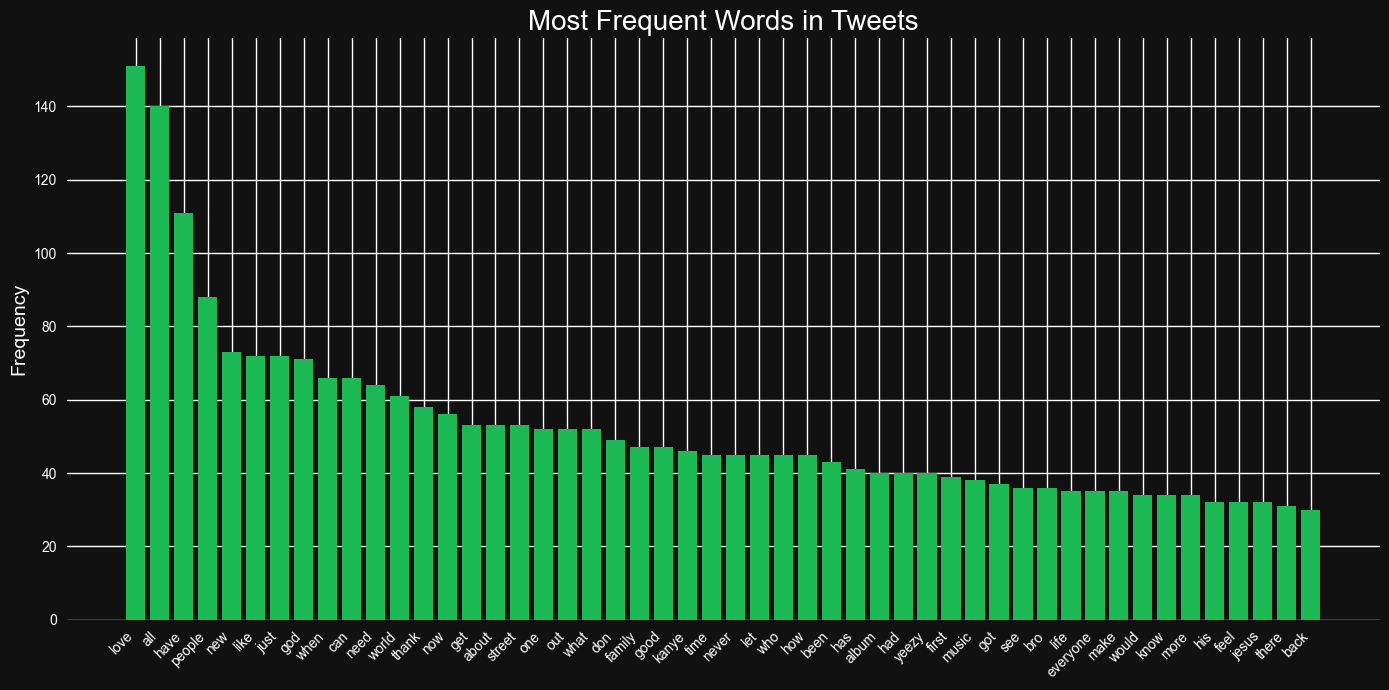

In [67]:
import matplotlib.pyplot as plt

words, counts = zip(*top_words)

plt.figure(figsize=(14, 7))
plt.bar(words, counts, color="#1DB954")  # зелёный стиль

plt.xticks(rotation=45, ha="right", color="white")
plt.title("Most Frequent Words in Tweets", fontsize=20, color="white")
plt.ylabel("Frequency", fontsize=14, color="white")

plt.gca().set_facecolor("#111111")
plt.gcf().patch.set_facecolor("#111111")
plt.tick_params(colors="white")

plt.tight_layout()
plt.show()

In [77]:
topic_dict = {
    "religion": [
        "god","jesus","praying","christian","faith","lord","praise","spirit","blessings","gospel","pray","christ","divine"
    ],
    "family": [
        "family","kids","daughter","wife","mom","mother","father","home","love","loved","loving","brother","brothers"
    ],
    "music": [
        "album","music","song","songs","track","record","recording","studio","art","artist","artwork",
        "pablo","donda","ksg","yandhi","yeezus","lyrics","sample","cover"
    ],
    "business": [
        "yeezy","fashion","adidas","gap","balenciaga","brand","merch","nike","design","creative",
        "industry","business","billion","dollars","deal","product","release","market"
    ],
    "social": [
        "people","world","america","president","social","society","slavery","police","government",
        "revolution","pandemic","covid","culture","black","media","news","freedom","rights","community"
    ],
    "emotion": [
        "feel","feeling","hope","dream","dreams","positive","hurt","mental","healing","amazing",
        "inspiration","thank","thankful","proud","vibe","vibes","energy","truth","love"
    ],
    "general": [
        "time","day","year","today","tomorrow","going","make","know","see","put","take","life","got","new",
        "need","want","get","good","best","now"
    ],
    "names": [
        "kanye","west","kim","drake","virgil","trav","cudi","chainz","chance","jay","kendrick","pablo","chicago","atlanta"
    ]
}

In [80]:
def detect_topic(text):
    words = text.split()
    scores = {topic: 0 for topic in topic_dict}

    for topic, keywords in topic_dict.items():
        for w in words:
            if w in keywords:
                scores[topic] += 1

    if max(scores.values()) == 0:
        return "other"
    return max(scores, key=scores.get)

In [81]:
tweets["topic"] = tweets["clean_text"].apply(detect_topic)

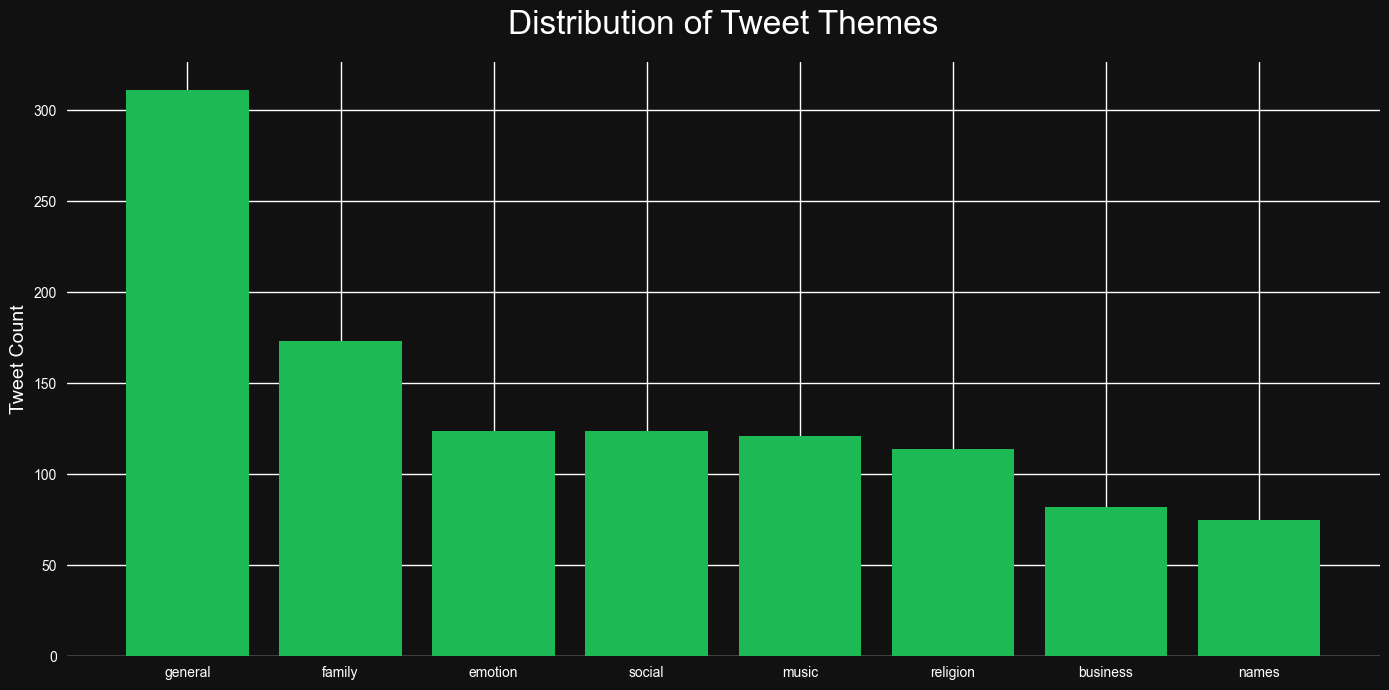

In [83]:
topic_counts = tweets["topic"].value_counts()

# убираем категорию "other"
topic_counts = topic_counts[topic_counts.index != "other"]

fig, ax = plt.subplots(figsize=(14, 7))

color = "#1DB954"  # зелёный
background = "#111111"
text = "#FFFFFF"

ax.bar(topic_counts.index, topic_counts.values, color=color)

ax.set_title("Distribution of Tweet Themes", fontsize=24, color=text, pad=20)
ax.set_ylabel("Tweet Count", fontsize=14, color=text)

ax.tick_params(colors=text)
ax.set_facecolor(background)
fig.patch.set_facecolor(background)

plt.tight_layout()
plt.show()

In [85]:
tweets["created_at"] = tweets["created_at"].dt.tz_localize(None)
tweets["date"] = tweets["created_at"].dt.to_period("M")

In [86]:
topic_time = tweets.groupby(["date", "topic"]).size().reset_index(name="count")
topic_time["date"] = topic_time["date"].dt.to_timestamp()

In [90]:
topics = tweets["topic"].unique().tolist()
topics

['music',
 'other',
 'general',
 'emotion',
 'social',
 'family',
 'names',
 'business',
 'religion']

In [91]:
topics = [t for t in topics if t != "other"]

In [92]:
tweets["created_at"] = tweets["created_at"].dt.tz_localize(None)

In [93]:
tweets["month"] = tweets["created_at"].dt.to_period("M")

In [94]:
tweets["month"] = tweets["created_at"].dt.to_period("M")

In [97]:
tweets["created_at"] = tweets["created_at"].dt.tz_localize(None)
tweets["month"] = tweets["created_at"].dt.to_period("M")

In [98]:
topic_monthly = (
    tweets.groupby(["month", "topic"])
    .size()
    .reset_index(name="count")
)

In [99]:
topic_monthly["month"] = topic_monthly["month"].dt.to_timestamp()

In [100]:
topic_monthly["topic"].unique()

array(['music', 'other', 'general', 'emotion', 'social', 'family',
       'names', 'business', 'religion'], dtype=object)

In [101]:
# Убираем таймзону
tweets["created_at"] = tweets["created_at"].dt.tz_localize(None)

# Месяц
tweets["month"] = tweets["created_at"].dt.to_period("M")

# ==== СОЗДАЁМ topic_monthly ====
topic_monthly = (
    tweets.groupby(["month", "topic"])
    .size()
    .reset_index(name="count")
)

# Конвертация для matplotlib
topic_monthly["month"] = topic_monthly["month"].dt.to_timestamp()

# Список тем (без other)
topics = [t for t in tweets["topic"].unique() if t != "other"]

# Проверяем
topic_monthly["topic"].unique()

array(['music', 'other', 'general', 'emotion', 'social', 'family',
       'names', 'business', 'religion'], dtype=object)

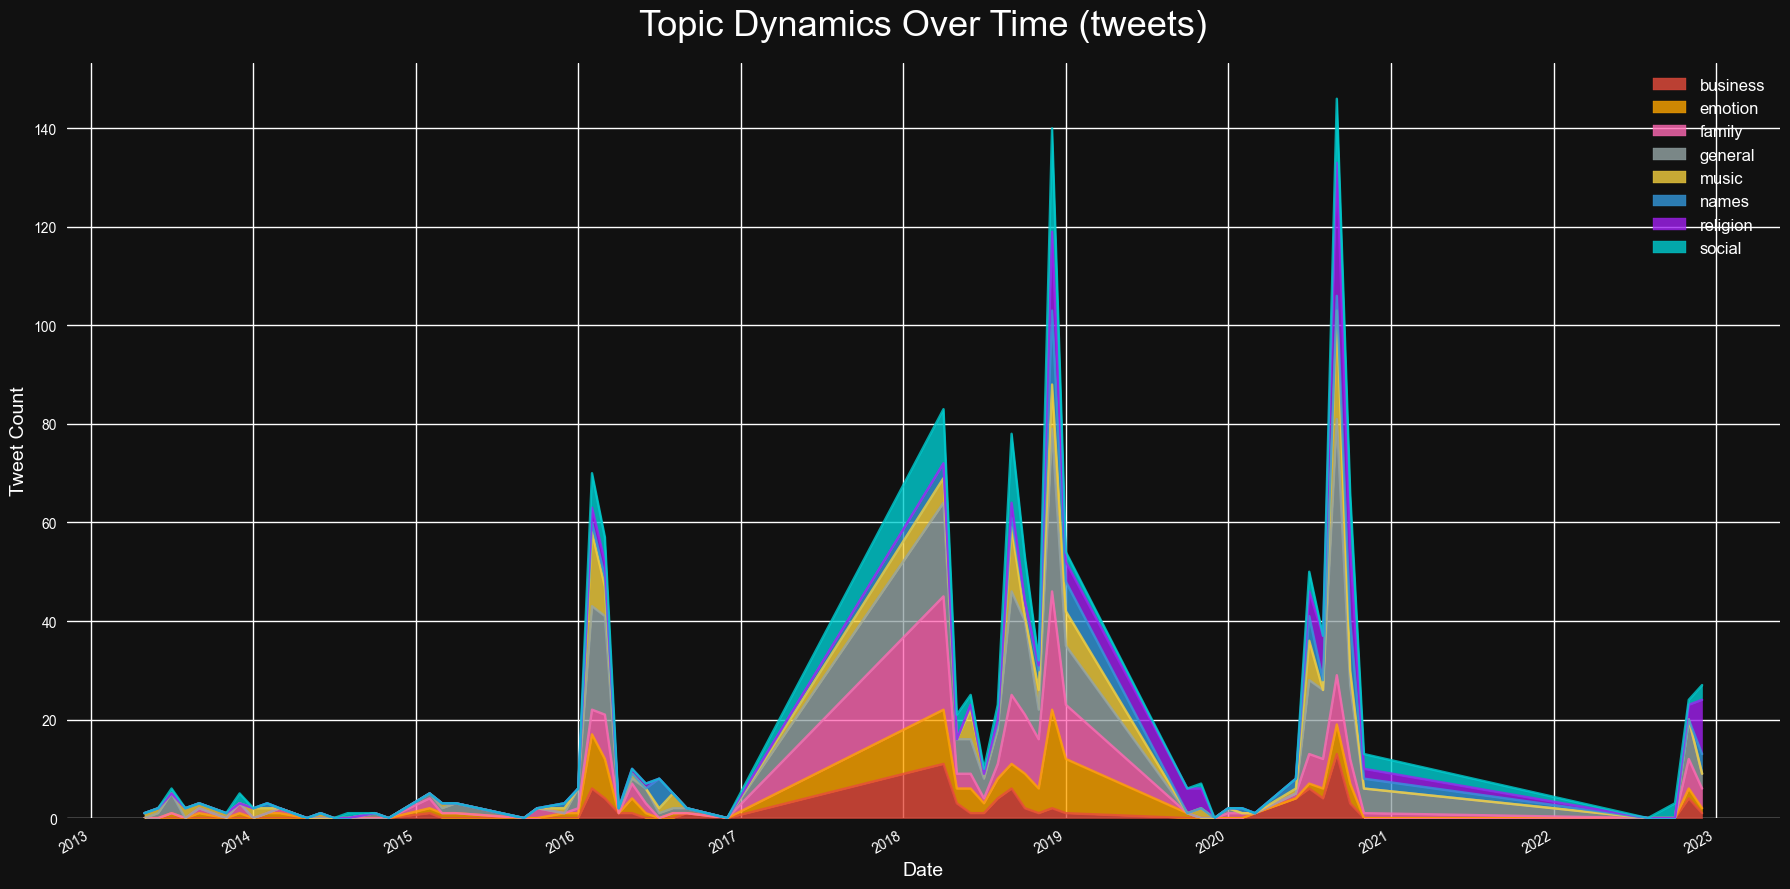

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

# pivot таблица: строки — месяц, столбцы — темы
pivot = topic_monthly.pivot(index="month", columns="topic", values="count").fillna(0)

# убираем "other", если есть
if "other" in pivot.columns:
    pivot = pivot.drop(columns=["other"])

# цвета
colors = {
    "religion":  "#A020F0",
    "family":    "#FF69B4",
    "emotion":   "#FFA500",
    "social":    "#00CED1",
    "music":     "#F4D03F",
    "business":  "#E74C3C",
    "names":     "#3498DB",
    "general":   "#95A5A6"
}

# упорядочим столбцы
pivot = pivot[sorted(pivot.columns)]

fig, ax = plt.subplots(figsize=(18, 9))
pivot.plot.area(
    ax=ax,
    color=[colors[c] for c in pivot.columns],
    alpha=0.8
)

background = "#111111"
text = "#FFFFFF"
ax.set_facecolor(background)
fig.patch.set_facecolor(background)

ax.set_title("Topic Dynamics Over Time (tweets)", fontsize=26, color=text, pad=20)
ax.set_ylabel("Tweet Count", fontsize=14, color=text)
ax.set_xlabel("Date", fontsize=14, color=text)
ax.tick_params(colors=text)

legend = ax.legend(facecolor=background, edgecolor="#444444", fontsize=12)
for label in legend.get_texts():
    label.set_color(text)

plt.tight_layout()
plt.show()

смерджим датасет треков и тем

In [105]:
tracks

,album_title,artist,labels,genres,critic_score,user_score,album_length,track_number,track_title,track_length,featured_artists,track_rating,track_rating_count,release_date_clean,year
0,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",1,Intro,0:19,NaN,78,1884,2004-02-10,2004
1,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",2,We Don't Care,3:59,NaN,93,4522,2004-02-10,2004
2,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",3,Graduation Day,1:21,NaN,82,2328,2004-02-10,2004
3,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",4,All Falls Down,3:43,Syleena Johnson,96,4622,2004-02-10,2004
4,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",5,I'll Fly Away,1:09,NaN,83,2437,2004-02-10,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,12,530,4:50,NaN,47,3021,2024-08-03,2024
218,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,13,DEAD,4:23,NaN,44,2876,2024-08-03,2024
219,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,14,FOREVER ROLLING,3:17,NaN,47,2849,2024-08-03,2024
220,VULTURES 2,¥$,YZY,"Pop Rap, Trap, Alternative R&B",40,28,49 minutes,15,SKY CITY,4:22,NaN,35,2947,2024-08-03,2024


In [107]:
themes = pd.read_csv("kanye_tracks_themes_full.csv")
themes.head()

,album,year,track,main_theme,subthemes,commentary
0,The College Dropout,2004,Intro,social,"education, expectations",Сатира на давление общества и академических норм.
1,The College Dropout,2004,We Don't Care,social,"youth, poverty, inequality",Критика городской бедности и отсутствия возмож...
2,The College Dropout,2004,Graduation Day,social,"discipline, conformity",Призыв не подчиняться системе образования.
3,The College Dropout,2004,All Falls Down,identity,"insecurity, capitalism",О низкой самооценке и потребительских стандартах.
4,The College Dropout,2004,I'll Fly Away,religion,freedom,"Госпел-вставка, символ духовного освобождения."


In [119]:
themes = themes.rename(columns={"track": "track_title"})

In [120]:
merged = tracks.merge(themes, on="track_title", how="left")

In [121]:
merged.head()
merged.columns

Index(['album_title', 'artist', 'labels', 'genres', 'critic_score',
       'user_score', 'album_length', 'track_number', 'track_title',
       'track_length', 'featured_artists', 'track_rating',
       'track_rating_count', 'release_date_clean', 'year_x', 'album', 'year_y',
       'main_theme', 'subthemes', 'commentary'],
      dtype='object')

In [122]:
merged = merged.drop(columns=["commentary"])

In [125]:
merged.to_csv("kanye_tracks_with_themes.csv", index=False, encoding="utf-8")

In [124]:
merged.head(3)

,album_title,artist,labels,genres,critic_score,user_score,album_length,track_number,track_title,track_length,featured_artists,track_rating,track_rating_count,release_date_clean,year_x,album,year_y,main_theme,subthemes
0,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",1,Intro,0:19,NaN,78,1884,2004-02-10,2004,The College Dropout,2004.0,social,"education, expectations"
1,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",2,We Don't Care,3:59,NaN,93,4522,2004-02-10,2004,The College Dropout,2004.0,social,"youth, poverty, inequality"
2,The College Dropout,Kanye West,"Def Jam, Roc-A-Fella","Chipmunk Soul, Pop Rap, Conscious Hip Hop, Neo...",81,91,"1 hour, 16 minutes",3,Graduation Day,1:21,NaN,82,2328,2004-02-10,2004,The College Dropout,2004.0,social,"discipline, conformity"


In [126]:
import re

def detect_topics(text):
    text = text.lower()
    found = set()

    for topic, keywords in topic_dict.items():
        for kw in keywords:
            if re.search(rf"\b{kw}\b", text):
                found.add(topic)

    return list(found) if found else ["other"]

In [127]:
tweets["topics"] = tweets["text"].apply(detect_topics)

In [128]:
tracks["year"] = tracks["release_date_clean"].dt.year

In [130]:
if "release_date_clean" in merged.columns:
    merged["year"] = merged["release_date_clean"].dt.year
elif "year_x" in merged.columns:
    merged["year"] = merged["year_x"]
elif "release_date" in merged.columns:
    merged["year"] = merged["release_date"].str.extract(r"(\d{4})").astype(int)
else:
    raise ValueError("Не удалось найти год релиза в merged")

In [131]:
theme_yearly = (
    merged.groupby(["year", "main_theme"])
          .size()
          .reset_index(name="count")
)

In [135]:
theme_counts = merged["main_theme"].value_counts()
big_themes = theme_counts[theme_counts > 3].index.tolist()
theme_yearly_filtered = theme_yearly[theme_yearly["main_theme"].isin(big_themes)]

In [133]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [139]:
all_themes = sorted(merged["main_theme"].dropna().unique())

In [143]:
theme_yearly = (
    merged.groupby(["year", "main_theme"])
          .size()
          .reset_index(name="count")
)

грфик темы твитов по годам

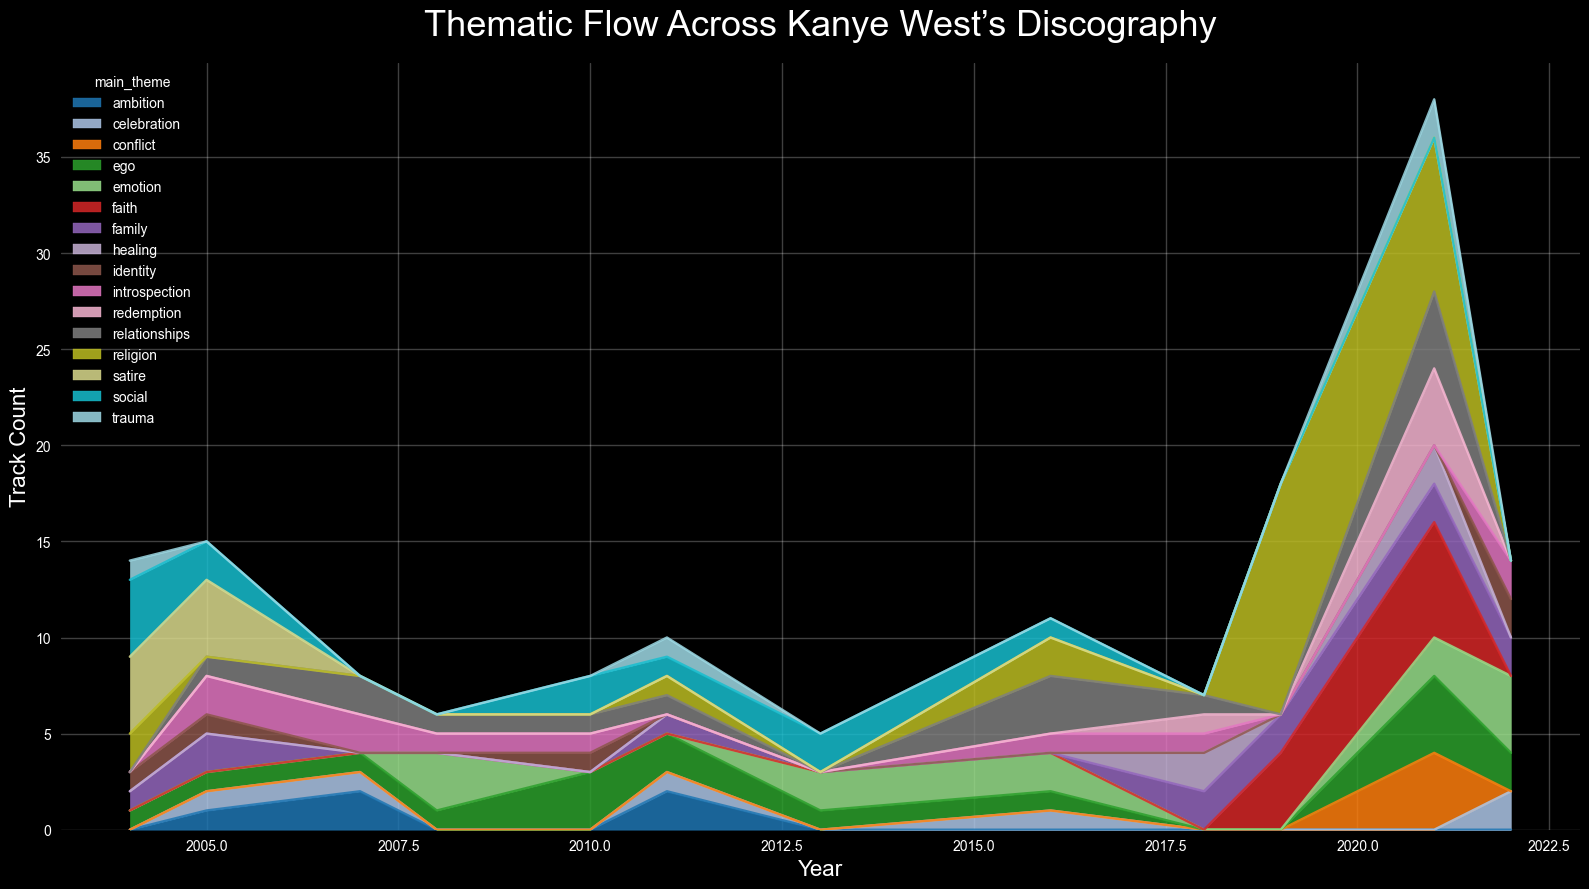

In [145]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# pivot: строки — год, колонки — темы
pivot = theme_yearly_filtered.pivot(index="year", columns="main_theme", values="count").fillna(0)

fig, ax = plt.subplots(figsize=(16, 9))

pivot.plot.area(
    ax=ax,
    cmap="tab20",       # много разных цветов
    alpha=0.85
)

ax.set_title("Thematic Flow Across Kanye West’s Discography", fontsize=26, pad=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Track Count", fontsize=16)
ax.grid(alpha=0.25)

plt.tight_layout()
plt.show()

In [146]:
topic_counts = tweets["topic"].value_counts()
topic_counts

topic
other       1329
general      311
family       173
emotion      124
social       124
music        121
religion     114
business      82
names         75
Name: count, dtype: int64

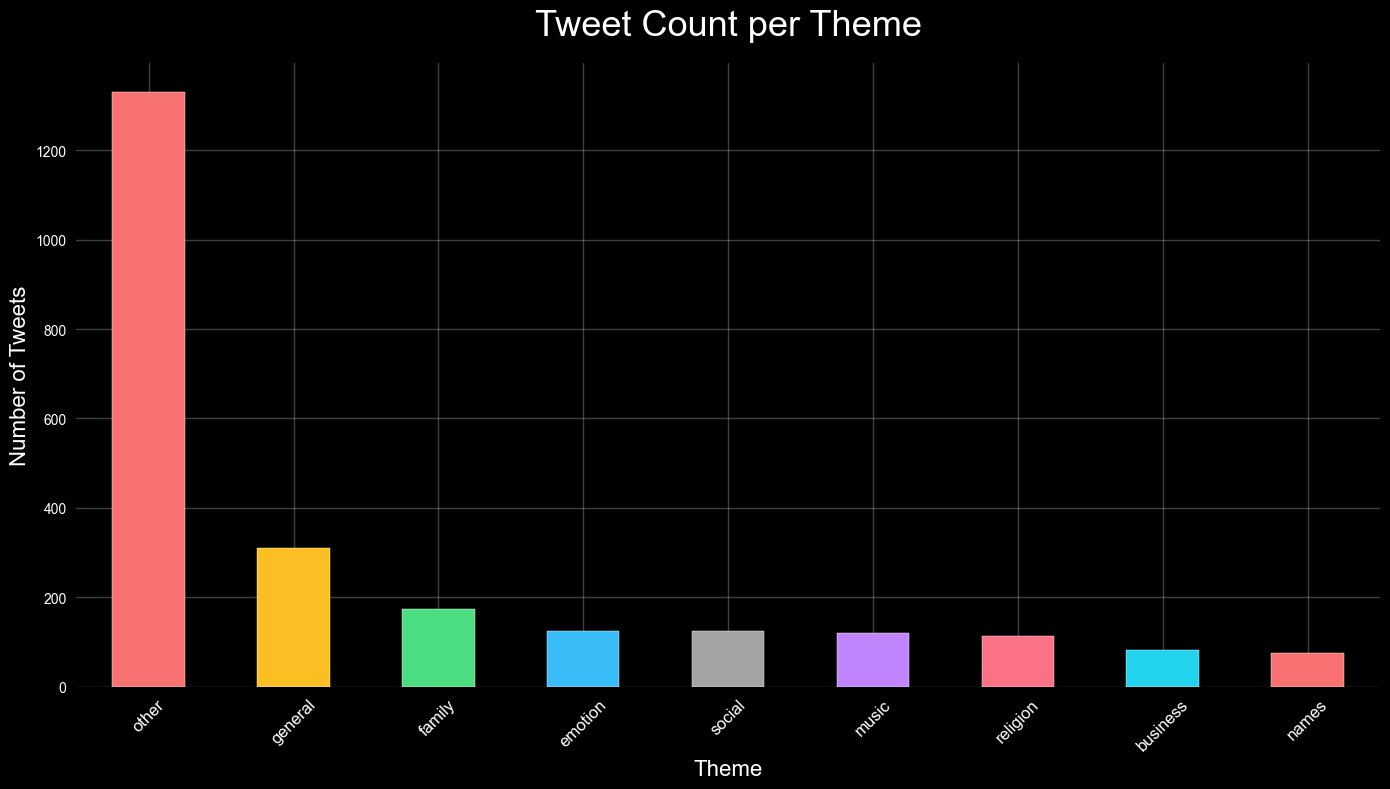

In [147]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(14, 8))

topic_counts.plot(
    kind="bar",
    color=["#f87171", "#fbbf24", "#4ade80", "#38bdf8", "#a3a3a3", "#c084fc", "#fb7185", "#22d3ee"],
    edgecolor="white"
)

ax.set_title("Tweet Count per Theme", fontsize=26, pad=20)
ax.set_xlabel("Theme", fontsize=16)
ax.set_ylabel("Number of Tweets", fontsize=16)
ax.grid(alpha=0.25)

plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [148]:
import pandas as pd

# год
tweets["year"] = tweets["created_at"].dt.year

# one-hot кодирование тем
topic_dummies = pd.get_dummies(tweets["topic"])

# собираем датафрейм для корреляции
corr_df = pd.concat([
    tweets[["year", "favorite_count", "retweet_count"]],
    topic_dummies
], axis=1)

corr_df.head()

,year,favorite_count,retweet_count,business,emotion,family,general,music,names,other,religion,social
480,2013,8042.0,15727,False,False,False,False,True,False,False,False,False
444,2013,12838.0,12499,False,False,False,False,False,False,True,False,False
1057,2013,10922.0,10440,False,False,False,False,False,False,True,False,False
1437,2013,2332.0,3583,False,False,False,True,False,False,False,False,False
1582,2013,6638.0,13610,False,False,False,False,True,False,False,False,False


In [149]:
corr_matrix = corr_df.corr()
corr_matrix

,year,favorite_count,retweet_count,business,emotion,family,general,music,names,other,religion,social
year,1.000000,0.100623,-0.159372,0.023165,-0.103023,-0.035204,-0.020811,-0.093530,0.015811,0.048935,0.137908,-0.007016
favorite_count,0.100623,1.000000,0.750010,0.019682,0.028507,0.063689,0.022730,0.018942,0.024278,-0.116504,0.057180,0.019079
retweet_count,-0.159372,0.750010,1.000000,-0.015132,0.061650,0.032947,0.037063,0.059884,0.009803,-0.109151,0.031136,0.007400
business,0.023165,0.019682,-0.015132,1.000000,-0.042911,-0.051227,-0.070862,-0.042361,-0.033027,-0.202218,-0.041056,-0.042911
emotion,-0.103023,0.028507,0.061650,-0.042911,1.000000,-0.063560,-0.087922,-0.052560,-0.040978,-0.250903,-0.050941,-0.053242
family,-0.035204,0.063689,0.032947,-0.051227,-0.063560,1.000000,-0.104961,-0.062746,-0.048919,-0.299526,-0.060813,-0.063560
general,-0.020811,0.022730,0.037063,-0.070862,-0.087922,-0.104961,1.000000,-0.086796,-0.067670,-0.414333,-0.084122,-0.087922
music,-0.093530,0.018942,0.059884,-0.042361,-0.052560,-0.062746,-0.086796,1.000000,-0.040453,-0.247690,-0.050288,-0.052560
names,0.015811,0.024278,0.009803,-0.033027,-0.040978,-0.048919,-0.067670,-0.040453,1.000000,-0.193110,-0.039207,-0.040978
other,0.048935,-0.116504,-0.109151,-0.202218,-0.250903,-0.299526,-0.414333,-0.247690,-0.193110,1.000000,-0.240058,-0.250903


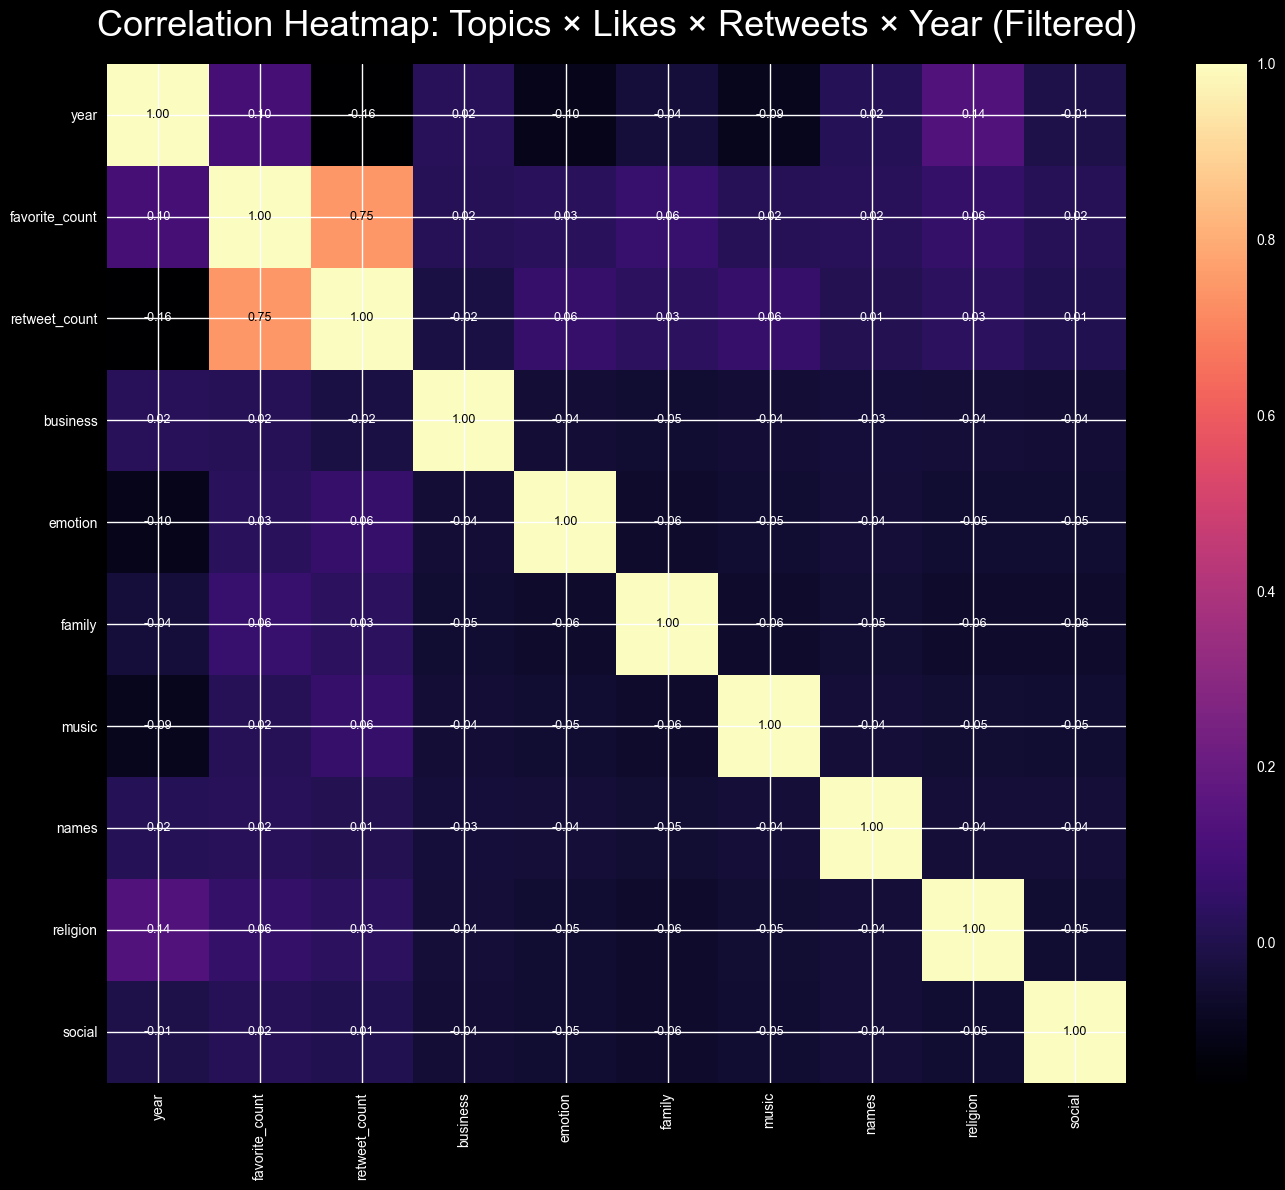

In [165]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

# --- Удаляем general и other из корреляционной матрицы ---
corr_clean = corr_matrix.drop(index=["general", "other"], errors="ignore") \
                        .drop(columns=["general", "other"], errors="ignore")

fig, ax = plt.subplots(figsize=(18, 12))

# heatmap
cax = ax.imshow(corr_clean, cmap="magma")

# подписи осей
ax.set_xticks(range(len(corr_clean.columns)))
ax.set_xticklabels(corr_clean.columns, rotation=90, fontsize=10)

ax.set_yticks(range(len(corr_clean.index)))
ax.set_yticklabels(corr_clean.index, fontsize=10)

ax.set_title(
    "Correlation Heatmap: Topics × Likes × Retweets × Year (Filtered)",
    fontsize=26, pad=20
)

# === Подписи значений в ячейках ===
for i in range(corr_clean.shape[0]):
    for j in range(corr_clean.shape[1]):
        val = corr_clean.iloc[i, j]
        text_color = "white" if abs(val) < 0.5 else "black"  # адаптивный цвет подписей
        ax.text(
            j, i, f"{val:.2f}",
            ha="center", va="center",
            color=text_color, fontsize=9
        )

# colorbar
fig.colorbar(cax, fraction=0.03, pad=0.04)

plt.tight_layout()
plt.show()

In [166]:
import pandas as pd
import numpy as np

# 1) убираем general и other
corr_clean = corr_matrix.drop(index=["general", "other"], errors="ignore") \
                        .drop(columns=["general", "other"], errors="ignore")

# 2) превращаем матрицу в длинный формат
corr_pairs = (
    corr_clean.where(~np.eye(corr_clean.shape[0], dtype=bool))  # маска для исключения диагонали
              .stack()                                         # превращаем в Series (row, col)
              .rename("corr")
              .reset_index()
)

# 3) убираем повторяющиеся пары (A-B и B-A)
corr_pairs["sorted"] = corr_pairs.apply(lambda x: tuple(sorted([x["level_0"], x["level_1"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates("sorted")

# 4) берем топ-7 по модулю
top7 = corr_pairs.reindex(corr_pairs["corr"].abs().sort_values(ascending=False).index).head(7)

top7 = top7[["level_0", "level_1", "corr"]]
print(top7)

           level_0         level_1      corr
10  favorite_count   retweet_count  0.750010
1             year   retweet_count -0.159372
7             year        religion  0.137908
3             year         emotion -0.103023
0             year  favorite_count  0.100623
5             year           music -0.093530
13  favorite_count          family  0.063689


Корреляционный анализ показывает, что вовлечённость твитов Канье (лайки и ретвиты) определяется не столько тематикой сообщений, сколько контекстом и эмоциональной насыщенностью публикаций. Лайки и ретвиты сильно коррелируют между собой, что говорит о том, что популярные твиты Канье вызывают комплексную реакцию аудитории: если твит «взлетает», он одновременно получает и лайки, и репосты. При этом год практически не влияет на вовлечённость — у Канье нет «золотого периода» в плане реакции аудитории, всплески происходят в разные годы и связаны, как правило, с конкретными событиями, а не временными трендами.

Тематики твитов в целом не показывают сильной связи с лайками и ретвитами. Это означает, что сама по себе тема — религия, музыка, эмоции или бизнес — не гарантирует высокую популярность. Наоборот, именно эмоциональный или конфликтный контекст делает твиты вирусными. Интересно, что категория «other» (неспециализированные, нейтральные посты) демонстрирует заметно отрицательную корреляцию с вовлечённостью: чем более обобщённый или бытовой твит, тем меньше реакций он получает. Это подчёркивает, что аудитория Канье в Twitter реагирует преимущественно на содержательные, эмоциональные или резонансные сообщения.

Социальные и политические темы обладают чуть более высокой корреляцией с ретвитами, что отражает природу такой информации: подобные сообщения чаще распространяются пользователями, даже если они вызывают спорные эмоции. Религиозная тематика, напротив, более коррелирует с годом, что указывает на её ярко выраженную сезонность в творчестве Канье — её всплески приходятся на период работы над Jesus Is King и Donda.

В целом анализ подтверждает: Канье — «event-driven» коммуникатор. Реакция аудитории определяется не стабильной тематикой, а всплесками внимания вокруг отдельных событий, конфликтов и эмоциональных всплесков. Темы в его твитах существуют скорее изолированно и редко пересекаются, что говорит о широком разнообразии направлений выражения, но не об устойчивых тематических паттернах.

In [151]:
events = pd.read_csv("events.csv")
events

,event_id,date,year,period,event,category,emotion_expected,notes
0,1,2013-02-05,2013,Yeezus Era,Kanye criticizes Nike publicly,business,anger; defiance,Start of major fashion conflict
1,2,2013-03-10,2013,Yeezus Era,"You ain't got the answers, Sway! interview",public,anger; frustration,Iconic emotional outburst
2,3,2013-03-28,2013,Yeezus Era,Kanye begins Yeezus studio sessions,music,excitement; ambition,New sonic direction
3,4,2013-04-15,2013,Yeezus Era,Kanye moves to Paris for fashion work,fashion,anticipation; pride,NaN
4,5,2013-06-18,2013,Yeezus Era,Release of Yeezus,music,anger; rebellion; ambition,Industry-disrupting album
5,6,2013-08-23,2013,Yeezus Era,Bound 2 music video backlash,public,surprise; amusement,Heavy meme activity
6,7,2013-10-21,2013,Yeezus Era,Proposal to Kim Kardashian,personal,joy; love,NaN
7,8,2013-12-01,2013,Yeezus Era,Kanye begins developing Yeezy Season,fashion,anticipation; pride,NaN
8,9,2014-02-20,2014,Family Era,Kanye announces long-term Adidas partnership,business,optimism; pride,Massive deal for Yeezy
9,10,2014-05-24,2014,Family Era,Wedding with Kim Kardashian,personal,joy; trust,NaN


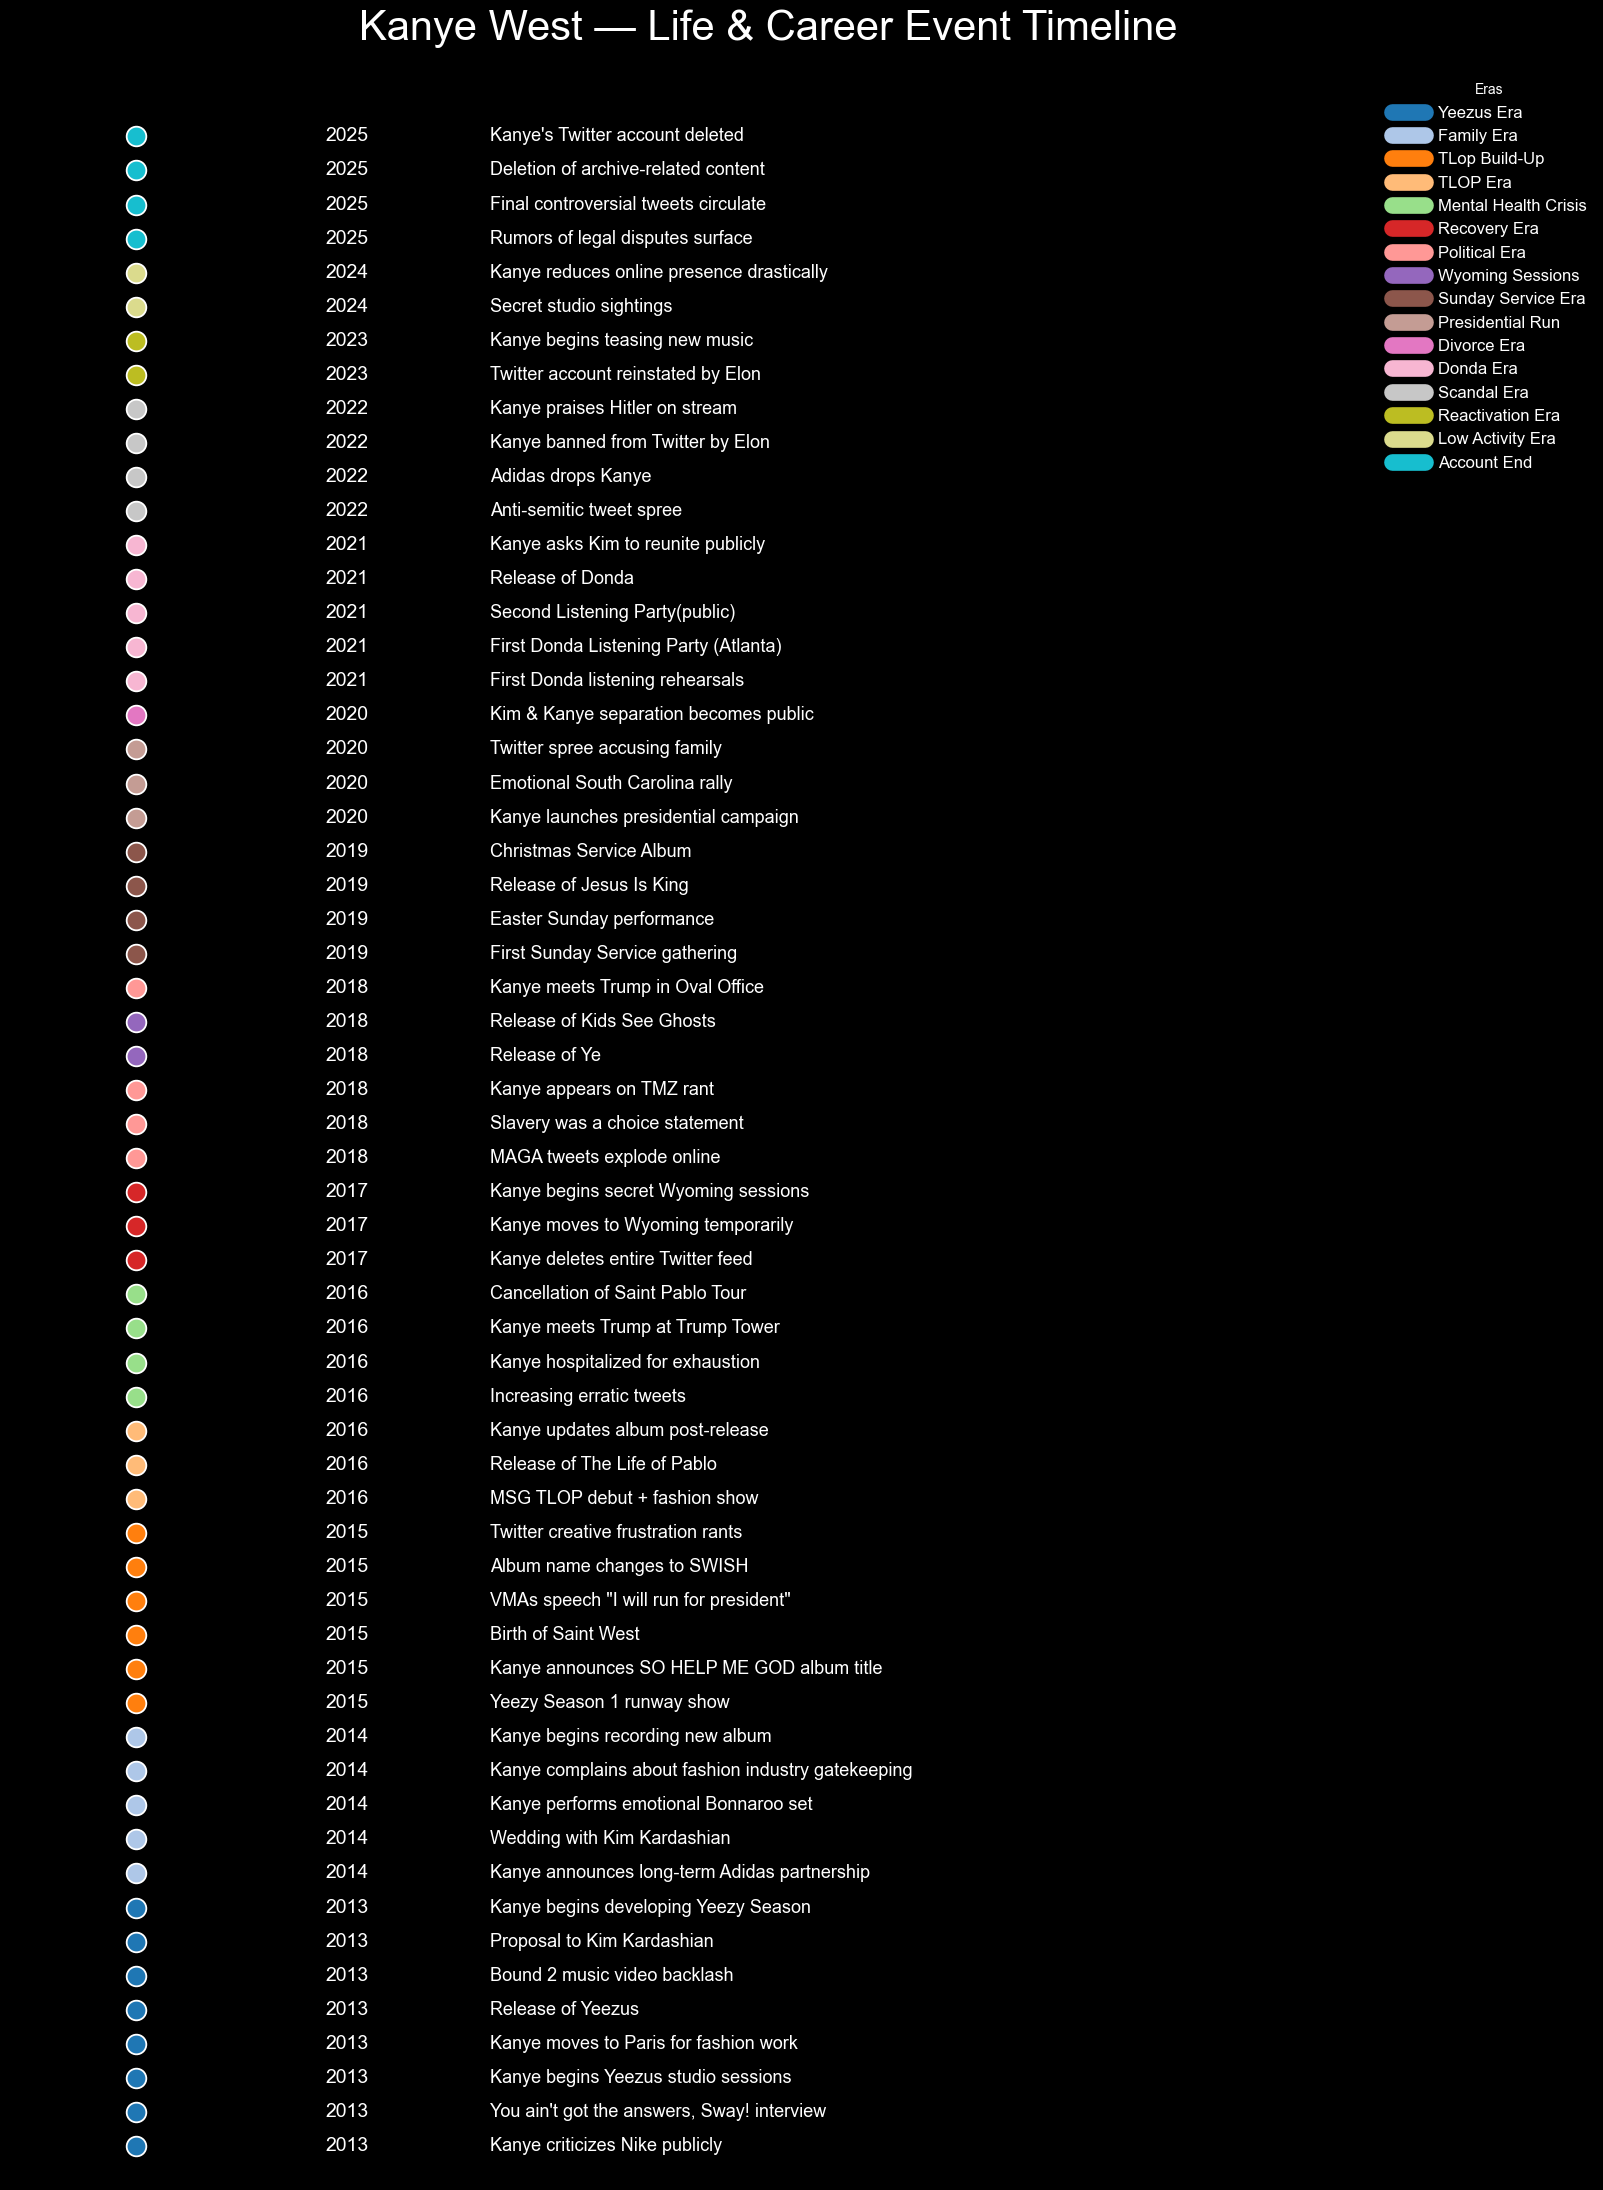

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("dark_background")

# сортируем события по дате
events["date"] = pd.to_datetime(events["date"])
events = events.sort_values("date")

# список эпох и цвета
periods = events["period"].unique()
period_colors = {p: plt.cm.tab20(i / len(periods)) for i, p in enumerate(periods)}

# создаём фигуру
fig, ax = plt.subplots(figsize=(16, 22))

# вертикальные позиции для событий
y_positions = list(range(len(events)))

# точки
for i, (_, row) in enumerate(events.iterrows()):
    ax.scatter(
        -0.1,                       # точка слева
        y_positions[i],
        s=200,
        color=period_colors[row["period"]],
        edgecolor="white",
        linewidth=1.3,
        zorder=3
    )

    # подпись года
    ax.text(
        0.05,
        y_positions[i],
        str(row["year"]),
        fontsize=14,
        ha="left",
        va="center",
        color="white"
    )

    # подпись события
    ax.text(
        0.18,
        y_positions[i],
        row["event"],
        fontsize=13,
        ha="left",
        va="center",
        color="white",
        wrap=True
    )

# оформление
ax.set_title("Kanye West — Life & Career Event Timeline", fontsize=30, pad=20)
ax.set_ylim(-1, len(events)+1)
ax.set_xlim(-0.2, 1)

ax.set_yticks([])     # скрываем y-ось
ax.set_xticks([])     # скрываем x-ось

# легенда эпох
handles = [plt.Line2D([0], [0], color=period_colors[p], lw=12) for p in periods]
ax.legend(handles, periods, title="Eras", bbox_to_anchor=(1.05, 1), fontsize=12)

plt.tight_layout()
plt.show()

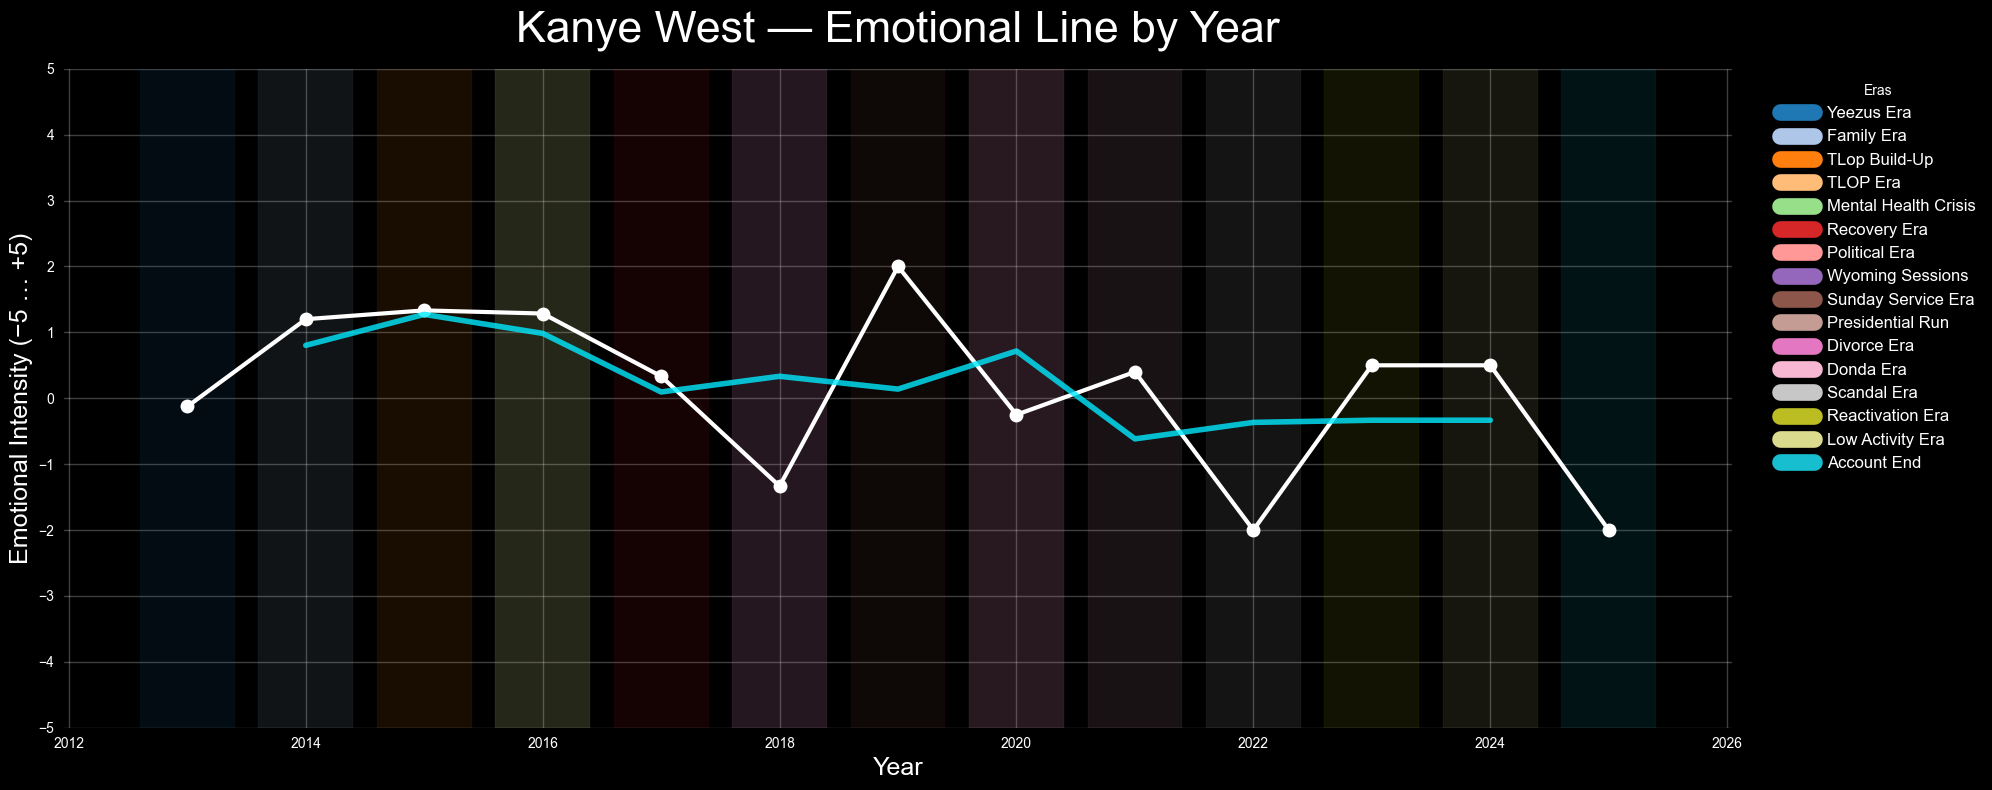

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use("dark_background")

# --- главная эмоция ---
events["main_emotion"] = events["emotion_expected"].fillna("").apply(lambda x: x.split(";")[0].strip())

# --- эмоциональная шкала -5..+5 ---
emotion_scale = {
    "rage": -5, "anger": -4, "frustration": -3, "anxiety": -2,
    "sadness": -1, "neutral": 0, "anticipation": 1, "ambition": 2,
    "pride": 3, "joy": 4, "excitement": 5
}

events["emotion_y"] = events["main_emotion"].map(emotion_scale).fillna(0)

# --- средняя эмоция по годам ---
emotion_yearly = events.groupby("year")["emotion_y"].mean().reset_index()

# --- эпохи ---
periods = events["period"].unique()
period_colors = {p: plt.cm.tab20(i / len(periods)) for i, p in enumerate(periods)}

# --- фон эпох ---
fig, ax = plt.subplots(figsize=(20, 8))

for period in periods:
    dfp = events[events["period"] == period]
    start, end = dfp["year"].min(), dfp["year"].max()
    ax.axvspan(start - 0.4, end + 0.4,
               color=period_colors[period], alpha=0.10)

# --- сама эмоциональная линия ---
ax.plot(
    emotion_yearly["year"],
    emotion_yearly["emotion_y"],
    color="white",
    linewidth=3,
    marker="o",
    markersize=10
)

# --- сглаживание (moving average 3 года) ---
emotion_yearly["smooth"] = (
    emotion_yearly["emotion_y"]
    .rolling(window=3, center=True)
    .mean()
)

ax.plot(
    emotion_yearly["year"],
    emotion_yearly["smooth"],
    color="#00eaff",
    linewidth=4,
    alpha=0.8,
    label="Smoothed Emotion Curve"
)

# оформление
ax.set_title("Kanye West — Emotional Line by Year", fontsize=32, pad=20)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Emotional Intensity (−5 … +5)", fontsize=18)

ax.set_yticks(range(-5, 6))
ax.grid(alpha=0.25)

# легенда эпох
handles = [plt.Line2D([0], [0], color=period_colors[p], lw=12) for p in periods]
ax.legend(handles, periods, title="Eras", bbox_to_anchor=(1.02, 1), fontsize=12)

plt.tight_layout()
plt.show()